In [1]:
import pandas as pd 
import numpy as np

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

C:\SOHEL\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\SOHEL\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [3]:
df=pd.read_csv('HSp_Data.csv', encoding= 'latin1', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,NaN,count,hate_speech,offensive_language,neither,class,tweet
1,0.0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
2,1.0,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
3,2.0,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
4,3.0,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...


In [5]:
df=df[[6,5]]

In [6]:
df.columns=['twitts','class']
df.head()

,twitts,class
0,tweet,class
1,!!! RT @mayasolovely: As a woman you shouldn't...,2
2,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
4,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1


In [7]:
df['class'].value_counts()

1        19190
2         4163
0         1430
class        1
Name: class, dtype: int64

In [8]:
sent_map={0:'Hate speech',1:'Offencive language',2:'Not Hate and Offencive'}

In [9]:
###Words Count

In [10]:
df['Words_Count']=df['twitts'].apply(lambda x: len(str(x).split()))

In [11]:
df.head()

,twitts,class,Words_Count
0,tweet,class,1
1,!!! RT @mayasolovely: As a woman you shouldn't...,2,25
2,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16
3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21
4,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9


In [12]:
###Character count

In [13]:
df['Chars_Count']=df['twitts'].apply(lambda x: len(x))

In [14]:
df.head()

,twitts,class,Words_Count,Chars_Count
0,tweet,class,1,5
1,!!! RT @mayasolovely: As a woman you shouldn't...,2,25,140
2,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16,85
3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21,120
4,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9,62


In [15]:
###Stop Words count

In [16]:
print(STOP_WORDS)

{'either', 'any', 'hundred', 'over', 'behind', 'of', 'can', 'many', 'some', 'for', 'often', 'becomes', 'everywhere', 'nowhere', 'else', '’re', 'together', 'give', 'towards', 'us', 'somewhere', 'amount', 'own', 'himself', 'against', 'beforehand', 'thereafter', 'here', 'n‘t', 'must', 'meanwhile', 'their', 'our', 'you', 'eight', 'full', 'anywhere', 'twelve', 'does', 'noone', 'front', 'through', 'did', 'when', 'further', 'whether', 'well', 'six', 'seem', 'could', 'up', 'thru', 'before', '‘m', 'get', 'him', 'few', 'although', 'thereupon', 'it', 'becoming', 'whom', 'thence', 'not', 'there', '‘re', 'into', 'besides', 'very', 'hereupon', 'back', 'she', '’ve', 'an', 'may', 'other', 'name', 'afterwards', 'might', '‘ve', 'elsewhere', 'seems', 'are', 'be', 'already', 'nine', "'m", 'yourselves', 'became', 'sometime', 'same', 'enough', 'really', 'around', 'due', 'hereby', 'whoever', 'the', 'formerly', 'again', 'regarding', 'ever', 'just', 'much', 'empty', 'your', 'across', 'why', "'d", 'last', 'do',

In [17]:
print(len(STOP_WORDS))

326


In [18]:
df['stop_words-len']=df['twitts'].apply(lambda x:len([t for t in x.split()if t in STOP_WORDS]))

In [19]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len
0,tweet,class,1,5,0
1,!!! RT @mayasolovely: As a woman you shouldn't...,2,25,140,12
2,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16,85,3
3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21,120,7
4,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9,62,2


In [20]:
### Count #tags and @Mentions

In [21]:
df['hashtags_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('#') ]))
df['mentions_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('@') ]))

In [22]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count
0,tweet,class,1,5,0,0,0
1,!!! RT @mayasolovely: As a woman you shouldn't...,2,25,140,12,0,1
2,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16,85,3,0,1
3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21,120,7,0,2
4,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9,62,2,0,2


In [23]:
###If numeric digits are present in twitts

In [24]:
df['numeris_count']=df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [25]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count
0,tweet,class,1,5,0,0,0,0
1,!!! RT @mayasolovely: As a woman you shouldn't...,2,25,140,12,0,1,0
2,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16,85,3,0,1,0
3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21,120,7,0,2,0
4,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9,62,2,0,2,0


In [26]:
###Upper Case Word Counts

In [27]:
df['upper_count']=df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [28]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count
0,tweet,class,1,5,0,0,0,0,0
1,!!! RT @mayasolovely: As a woman you shouldn't...,2,25,140,12,0,1,0,1
2,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16,85,3,0,1,0,1
3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21,120,7,0,2,0,2
4,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9,62,2,0,2,0,1


In [29]:
###Prepocessing and cleaning

In [30]:
###Lower case Conversion

In [31]:
df['twitts']=df['twitts'].apply(lambda x: x.lower())

In [32]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count
0,tweet,class,1,5,0,0,0,0,0
1,!!! rt @mayasolovely: as a woman you shouldn't...,2,25,140,12,0,1,0,1
2,!!!!! rt @mleew17: boy dats cold...tyga dwn ba...,1,16,85,3,0,1,0,1
3,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...,1,21,120,7,0,2,0,2
4,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,1,9,62,2,0,2,0,1


In [33]:
contractions={
"aight":"alright",
"ain't":"is not",
"amn't":" am not",
"aren't": "are not",
"can't":"can not",
"cause":"because",
"could've":"could have",
"couldn't":"could not",
"couldn'tve":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"dunno":"do not know",
"d'ye":"do you",
"e'er":"ever",
"everybody's":"everybody is",
"everyone's":"everyone is",
"finna":"fixing",
"g'day":"good day",
"gimme":"give me",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not",
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had",
"he'll":"he will",
"he's":"he is",
"he've":"he have",
"how'd":"how did",
"howdy":"how do you do",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"i had",
"I'd've":"i would have",
"I'll":"i will",
"I'm":"i am",
"I'm'a":"i am about to",
"I'm'o":"i am going to",
"innit":"is it not",
"I've":"i have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"iunno":"i do not know",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"methinks":"me thinks",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"ne'er":"never",
"o'clock":"of the clock",
"o'er":"over",
"ol'":"old",
"oughtn't":"ought not",
"'s":"is",
"shalln't":"shall not",
"shan't":"shall not",
"she'd":"she had",
"she'll":"she shall",
"she's":"she has",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'l":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"'tis":"it is",
"to've":"to have",
"'twas":"it was",
"wanna":"want to",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"willn't":"will not",
"won't":"will not",
"wonnot":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'all":"you all",
"y'all'd've":"you all would have",
"y'all're":"you all are",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}


In [34]:
def  cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x= x.replace(key, value)
        return x
    else:
        return x

In [35]:
%%time
df['twitts']=df['twitts'].apply(lambda x:cont_to_exp(x))

Wall time: 639 ms


In [36]:
###For Example

In [37]:
x="hi, I'd be happy"

In [38]:
cont_to_exp(x)

'hi, i had be happy'

In [39]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count
0,tweet,class,1,5,0,0,0,0,0
1,!!! rt @mayasolovely: as a woman you should no...,2,25,140,12,0,1,0,1
2,!!!!! rt @mleew17: boy dats cold...tyga dwn ba...,1,16,85,3,0,1,0,1
3,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...,1,21,120,7,0,2,0,2
4,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,1,9,62,2,0,2,0,1


In [40]:
import re

In [41]:
x='hi aminmoh0193@gmail.com abn how are you'

In [42]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x)

['aminmoh0193@gmail.com']

In [43]:
df['emails']=df['twitts'].apply(lambda x:re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x))

In [44]:
df['emails_count']=df['emails'].apply(lambda x:len(x))

In [45]:
df[df['emails_count']>0].head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count,emails,emails_count
2244,2fine4cheapwine@yahoo.com &#171;@datjollygirl ...,1,19,141,8,0,0,0,0,[2fine4cheapwine@yahoo.com],1
7019,@shareefkeyes fat hoes need a treadmill??? lol...,1,9,77,1,0,1,0,0,[therealwesjames@gmail.com],1
19215,rt @iammaliachigh: every bitch with her ass ou...,1,20,132,7,0,1,0,1,[backpagepussy@gmail.com],1


In [46]:
x='hi, i would like to visit https://youtube.com/kaggle'

In [47]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)

[('https', 'youtube.com', '/kaggle')]

In [48]:
df['Url_flag']=df['twitts'].apply(lambda x:len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)))

In [49]:
###Removiing or subrtacting all links

In [50]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x)

'hi, i would like to visit '

In [51]:
df['twitts']=df['twitts'].apply(lambda x:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x))

In [52]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count,emails,emails_count,Url_flag
0,tweet,class,1,5,0,0,0,0,0,[],0,0
1,!!! rt @mayasolovely: as a woman you should no...,2,25,140,12,0,1,0,1,[],0,0
2,!!!!! rt @mleew17: boy dats cold...tyga dwn ba...,1,16,85,3,0,1,0,1,[],0,0
3,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...,1,21,120,7,0,2,0,2,[],0,0
4,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,1,9,62,2,0,2,0,1,[],0,0


In [53]:
df.loc[0]['twitts']

'tweet'

In [54]:
###Removing RT(Retwitts)

In [55]:
df['twitts']=df['twitts'].apply(lambda x: re.sub('RT',"",x))

In [56]:
###Removing Special Character or puntuation

In [57]:
df['twitts']=df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9]+', '',x))

In [58]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count,emails,emails_count,Url_flag
0,tweet,class,1,5,0,0,0,0,0,[],0,0
1,rt mayasolovely as a woman you should not com...,2,25,140,12,0,1,0,1,[],0,0
2,rt mleew17 boy dats coldtyga dwn bad for cuff...,1,16,85,3,0,1,0,1,[],0,0
3,rt urkindofbrand dawg rt 80sbaby4life you eve...,1,21,120,7,0,2,0,2,[],0,0
4,rt cganderson vivabased she look like a tranny,1,9,62,2,0,2,0,1,[],0,0


In [59]:
###Removing extra spaces

In [60]:
x='   Thanks   a lot   Sir   for offering us the    project '

In [61]:
" ".join(x.split())

'Thanks a lot Sir for offering us the project'

In [62]:
df['twitts']=df['twitts'].apply(lambda x:" ".join(x.split()) )

In [63]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count,emails,emails_count,Url_flag
0,tweet,class,1,5,0,0,0,0,0,[],0,0
1,rt mayasolovely as a woman you should not comp...,2,25,140,12,0,1,0,1,[],0,0
2,rt mleew17 boy dats coldtyga dwn bad for cuffi...,1,16,85,3,0,1,0,1,[],0,0
3,rt urkindofbrand dawg rt 80sbaby4life you ever...,1,21,120,7,0,2,0,2,[],0,0
4,rt cganderson vivabased she look like a tranny,1,9,62,2,0,2,0,1,[],0,0


In [64]:
###Removing HTML tags

In [65]:
from bs4 import BeautifulSoup

In [66]:
x='<html><h2>Thanks a lot<h2><html>'

In [67]:
BeautifulSoup(x, 'lxml').get_text()

'Thanks a lot'

In [68]:
%%time
df['twitts']=df['twitts'].apply(lambda x: BeautifulSoup(x,'lxml').get_text() )

Wall time: 4.35 s


In [69]:
###Removing Accented character
### The code will covert it to normal sentence

In [70]:
import unicodedata

In [71]:
x='àòèåñì'

In [72]:
def remove_accented_chars(x):
    x= unicodedata.normalize('NFKD',x).encode('ascii', 'ignore').decode('utf-8','ignore')
    return x

In [73]:
remove_accented_chars(x)

'aoeani'

In [74]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count,emails,emails_count,Url_flag
0,tweet,class,1,5,0,0,0,0,0,[],0,0
1,rt mayasolovely as a woman you should not comp...,2,25,140,12,0,1,0,1,[],0,0
2,rt mleew17 boy dats coldtyga dwn bad for cuffi...,1,16,85,3,0,1,0,1,[],0,0
3,rt urkindofbrand dawg rt 80sbaby4life you ever...,1,21,120,7,0,2,0,2,[],0,0
4,rt cganderson vivabased she look like a tranny,1,9,62,2,0,2,0,1,[],0,0


In [75]:
### SpaCy and NLP
### Removing Stop Words

In [76]:
import spacy

In [77]:
x='this the way of removing stop words an the this what'

In [78]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'way removing stop words'

In [79]:
df['twitts']=df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]) )

In [80]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count,emails,emails_count,Url_flag
0,tweet,class,1,5,0,0,0,0,0,[],0,0
1,rt mayasolovely woman complain cleaning house ...,2,25,140,12,0,1,0,1,[],0,0
2,rt mleew17 boy dats coldtyga dwn bad cuffin da...,1,16,85,3,0,1,0,1,[],0,0
3,rt urkindofbrand dawg rt 80sbaby4life fuck bit...,1,21,120,7,0,2,0,2,[],0,0
4,rt cganderson vivabased look like tranny,1,9,62,2,0,2,0,1,[],0,0


In [81]:
###Converting a word in base or root form

In [82]:
spacy.prefer_gpu()

False

In [83]:
nlp = spacy.load('en_core_web_sm')

In [84]:
x = 'kenichan dived times ball managed save 50 rest'

In [85]:
def make_to_base(x):
    x_list =[]
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
            x_list.append(lemma)
    print(" ".join(x_list))

In [86]:
make_to_base(x)

In [87]:
###Common words removing as not important
### we will combine them both and convert them into a single sentence

In [88]:
df.head()['twitts']

0                                                tweet
1    rt mayasolovely woman complain cleaning house ...
2    rt mleew17 boy dats coldtyga dwn bad cuffin da...
3    rt urkindofbrand dawg rt 80sbaby4life fuck bit...
4             rt cganderson vivabased look like tranny
Name: twitts, dtype: object

In [89]:
' '.join(df.head()['twitts'])

'tweet rt mayasolovely woman complain cleaning house amp man trash rt mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place rt urkindofbrand dawg rt 80sbaby4life fuck bitch start cry confused shit rt cganderson vivabased look like tranny'

In [90]:
text= ' '.join(df['twitts'])

In [91]:
text =text.split()

In [92]:
freq_comm = pd.Series(text).value_counts()

In [93]:
f20=freq_comm[:20]

In [94]:
f20

bitch      8074
rt         7576
bitches    3032
like       2748
hoes       2316
pussy      2057
im         2056
hoe        1856
got        1600
ass        1560
fuck       1399
u          1270
shit       1255
nigga      1185
trash      1120
lol        1031
want        926
amp         834
know        805
niggas      774
dtype: int64

In [95]:
### Now we want to remove this most occuring words f20
### menas we put all other value in twitts except these 20 value

In [96]:
df['twitts']=df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]) )

In [97]:
###Rare Words removing

In [98]:
rare20= freq_comm[-20:]

In [99]:
rare20

doody                                         1
uti                                           1
tacos128514                                   1
kiddbravo615                                  1
towie                                         1
128072tiny                                    1
mlbis                                         1
128540128520128123127867128138127881127882    1
moneymakersent                                1
6pm                                           1
halfcrazy610                                  1
deeeeaaaadd                                   1
128519                                        1
wesideconnect                                 1
ingredients                                   1
urbandictionary                               1
8220villagebae                                1
zariavonmars                                  1
vntxnius                                      1
hidevon                                       1
dtype: int64

In [100]:
###Words occours atmost one time

In [101]:
rare= freq_comm[freq_comm.values == 1]

In [102]:
rare

brennanculp          1
grounded             1
preparations         1
8220irritated8221    1
ppli                 1
                    ..
urbandictionary      1
8220villagebae       1
zariavonmars         1
vntxnius             1
hidevon              1
Length: 25685, dtype: int64

In [103]:
df['twitts']=df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]) )

In [104]:
df.head()

,twitts,class,Words_Count,Chars_Count,stop_words-len,hashtags_count,mentions_count,numeris_count,upper_count,emails,emails_count,Url_flag
0,tweet,class,1,5,0,0,0,0,0,[],0,0
1,mayasolovely woman complain cleaning house man,2,25,140,12,0,1,0,1,[],0,0
2,mleew17 boy dats coldtyga dwn bad cuffin dat 1...,1,16,85,3,0,1,0,1,[],0,0
3,urkindofbrand dawg 80sbaby4life start cry conf...,1,21,120,7,0,2,0,2,[],0,0
4,cganderson vivabased look tranny,1,9,62,2,0,2,0,1,[],0,0


In [105]:
###Word Cloud Visualization

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
x= ' '.join(text[:20000])

In [108]:
len(text)

202239

In [109]:
###Creating Word cloud 
### In wordcloud function we can see which parameter we can pass that we need by using tab  

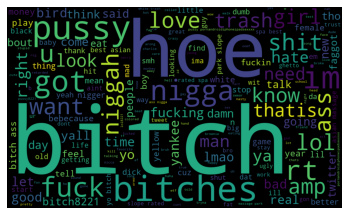

In [110]:
wc= WordCloud(width = 1000, height = 600).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [111]:
### This is our word cloud(Upper one)

In [112]:
### Now Spelling correction but we nedd some library(correction is not always 100% accurate)

In [113]:
from textblob import TextBlob

In [114]:
x= 'tanks for waching my fuun vigeo'

In [115]:
x= TextBlob(x).correct()

In [116]:
x 

TextBlob("tanks for watching my fun video")

In [117]:
### As I said every thing can not be correct so tanks is not correct but all other are correct

In [118]:
###Tokenization
### Tokenization can be done by textBlob and Spacy both.
### See the difference

In [119]:
x='thanks4watching this game. play again please'

In [120]:
TextBlob(x).words ### look hier fullstop is not count

WordList(['thanks4watching', 'this', 'game', 'play', 'again', 'please'])

In [121]:
doc = nlp(x)
for token in doc:   ### look hier fullstop is also a token
    print(token)

thanks4watching
this
game
.
play
again
please


In [122]:
### Lemmatization: It converts a word into a base form
### Hier we use Textblob

In [123]:
x= ' runs run running ran'

In [124]:
from textblob import Word

In [125]:
for token in x.split():
    print(Word(token).lemmatize())### using textblob


run
run
running
ran


In [126]:
doc = nlp(x)
for token in doc:
    print(token.lemma_) ### using spacy and gives better result then Textblob

 
run
run
run
run


In [127]:
### Detecting Entities using NER of SpaCy

In [128]:
x= "Breaking News: Sabrin, the leader of the project is looking to sign the deal for next 2 weeks "

In [129]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
    ### ent.text= token, ent.label_= what type of entity every word hier

Sabrin - PERSON - People, including fictional
next 2 weeks - DATE - Absolute or relative dates or periods


In [130]:
### we can also do it 
from spacy import displacy

In [131]:
displacy.render(doc,style = 'ent')

In [132]:
### detectin Noun

In [133]:
x= "Breaking News: Sabrin, the leader of the project is looking to sign the deal for next 2 weeks "

In [134]:
for noun in doc.noun_chunks:
    print(noun)### lets see how many nouns are there

the leader
the project
the deal
next 2 weeks


In [135]:
### Translation and language detection

In [136]:
x= "Breaking News: Sabrin, the leader of the project is looking to sign the deal for next 2 weeks "

In [137]:
tb= TextBlob(x)

In [138]:
tb.detect_language()

'en'

In [139]:
### Translating in another language

In [143]:
tb.translate(to='de')###https://www.loc.gov/standards/iso639-2/php/code_list.php

TextBlob("Breaking News: Sabrin, die Leiterin des Projekts, möchte den Vertrag für die nächsten 2 Wochen unterzeichnen")